In [5]:
from IPython.display import Image

### Lecture Material: https://drive.google.com/drive/folders/1MegSZTh_C4qM_z2KtCC89c-kBsSLTKjL?usp=sharing

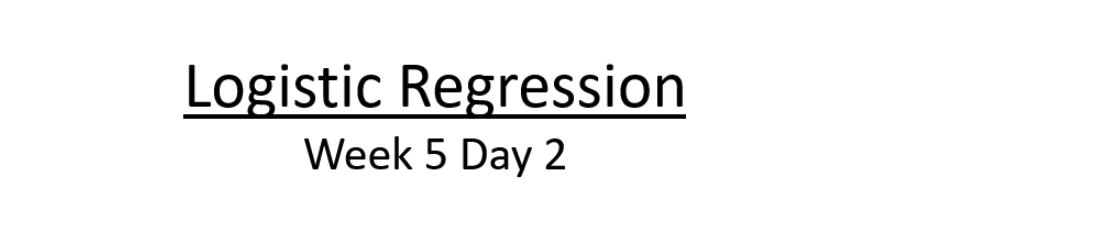

In [6]:
Image(filename='intro.PNG')

Slides Credit **Zain Hassan**

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt
%matplotlib inline

**Agenda:**

* "Express" Review of Linear Regression

* Limitations of Linear Regression

* Logistic regression
    
* Mention of GLM (generalised linear models)

## 1. Fast Review of Linear Regression

Let's imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target Variable.

In [8]:
df = pd.read_csv('data/weight-height.csv', usecols = ['Height', 'Weight'])
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [10]:
# Initializing a LR model
rm = Ridge() # ||y - Xw||^2 + lambda * ||w||^2 -> LSE with L2 regularization

# y  = m*x + b
X_train = df['Height'].values.reshape(-1, 1)
y_train = df['Weight']

In [11]:
rm.fit(X_train, y_train);

In [12]:
rm.predict(X_train)[:5]

array([219.16108997, 180.07242032, 221.19140492, 202.83112165,
       188.56054448])

In [13]:
rm.score(X_train, y_train)   # R^2 value - coefficient of determination

0.8551742120219649

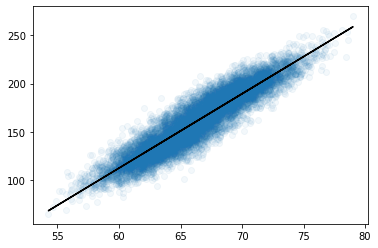

In [14]:
plt.scatter(X_train, y_train, alpha=0.05)

# y  = m*x + b

plt.plot(X_train, (rm.coef_*X_train) + rm.intercept_, c='black')

### So? How were we able to plot?

In [15]:
ridge_coeffs = rm.coef_
ridge_coeffs

array([7.7172355])

In [16]:
words_coeffs_df = pd.DataFrame(data = ridge_coeffs.T, index = ['Height'], columns=['Coefficients'])
words_coeffs_df

,Coefficients
Height,7.717236


In [17]:
ridge_intercept = rm.intercept_
ridge_intercept

-350.73373164219254

## Predicting

In [18]:
# True Value
y_train[0:1]

0    241.893563
Name: Weight, dtype: float64

In [19]:
rm.predict(X_train[0:1])

array([219.16108997])

## Prediction By Hand

In [20]:
(ridge_coeffs * X_train[0:1]).sum(axis=1) + rm.intercept_

array([219.16108997])

### 2. Limitations for Linear Regression

In Regression, we allow the response to take on any real number. But what if the range is restricted?

1. Positive values: river flow. 
    - Lower limit: 0
2. Percent/proportion data: proportion of income spent on housing in Vancouver. 
    - Lower limit: 0
    - Upper limit: 1. 
3. Binary data: success/failure data.
    - Only take values of 0 and 1.
4. Count data: number of male crabs nearby a nesting female
    - Only take count values (0, 1, 2, ...)

Notice the problem here!! **the regression lines extend beyond the possible range of the response**.   

This is *mathematically incorrect*, the expected value cannot extend outside of the range of Y. 

The *practical* consequences:
- When fitting a linear regression model when the range of the response is restricted, we lose hope for extrapolation, as we obtain logical fallacies if we do. 

- However, a linear regression model might still be useful in this restricted range. After all, the linear trend looks good for the range of the data. 


## Classification and Regression Problems (Quick Review)

![img](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png)

More specifically, in Logistic regression:

<img src="lincvslinr.png" width=500 height=500 />

### 3. Logistic Regression
<img src="partyguests2.PNG"/>

<img src="importance1.PNG"/>
<img src="importance2.PNG"/>

Note that **logistic regression is not a regression, but a classification learning algorithm**. The name comes from statistics and is due to the fact that the mathematical formulation of logistic regression is similar to that of linear regression.

- A linear model for classification. 
- It learns weights associated with each feature and the bias. 
- The decision boundary is a hyperplane dividing the feature space in "half". That's why we call it a linear classifier.

<img src="logregX1.jpg" width=500 height=500 />

<img src="InkedlogregY_LI.jpg" width=500 height=500 />

<img src="logreg3.jpg" width=500 height=500 />

* Source: https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer

### Explanation of Log Reg using USA and Canada Lat Long data


In [21]:
cities_df = pd.read_csv("data/canada_usa_cities.csv")
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]
cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA


In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Decision boundary of logistic regression

The decision boundary is a hyperplane dividing the feature space in half.

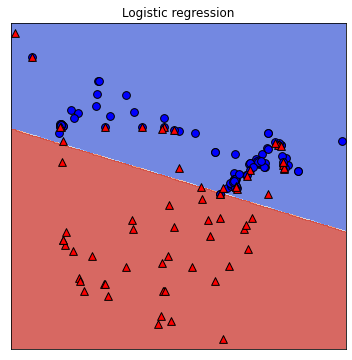

In [23]:
plt.figure(figsize=(6, 6))
plot_classifier(X_train, y_train, lr, ax=plt.gca())
plt.title("Logistic regression");

### Accessing learned weights

- Recall that logistic regression learns the weights $w$ and bias or intercept $b$

\begin{equation}
\begin{split}
z =& w_1x_1 + \dots w_dx_d + b\\
=& w^Tx + b
\end{split}
\end{equation}

- How to access these weights? 
    - In `sklearn`, the `coef_` attribute of the `LogisticRegression` object gives the weights of the features.

In [24]:
X_train.columns

Index(['longitude', 'latitude'], dtype='object')

In [25]:
print("Model weights: %s"%(lr.coef_)) # these are weights
print("Model intercept: %s"%(lr.intercept_)) # this is the bias term
data = {'features': X_train.columns, 'coefficients':lr.coef_[0]}
pd.DataFrame(data)

Model weights: [[-0.04108149 -0.33683126]]
Model intercept: [10.8869838]


,features,coefficients
0,longitude,-0.041081
1,latitude,-0.336831


- Both negative weights 
- The weight of latitude is larger in magnitude. 

### Prediction with learned weights

In [26]:
example = X_test.iloc[0,:]
example.tolist()

[-64.8001, 46.098]

In [27]:
lr.intercept_

array([10.8869838])

Calculate raw model output -> $\hat{y}$ as: ```y_hat = np.dot(w, x) + b```

In [28]:
np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)

array([-1.97817876])

In [33]:
1/9

0.1111111111111111

In [29]:
lr.classes_

array(['Canada', 'USA'], dtype=object)

- Our threshold here is 0
- The sign is negative and so predict class -1 (Canada in our case). 

In [30]:
lr.predict([example])

array(['Canada'], dtype=object)

### Scores to probabilities 

- The numbers we saw above are "raw model output".
- For linear regression this would have been the prediction.
- For logistic regression, you check the **sign** of this value.
  - If positive, predict $+1$; if negative, predict $-1$.
  - These are "hard predictions".
- You can also have "soft predictions", aka predicted probabilities. 
  - To convert the raw model output into probabilities, instead of taking the sign, we apply the sigmoid.

#### The sigmoid function 
- The sigmoid function "squashes" the raw model output from any number to the range $[0,1]$.
$$y' = \frac{1}{1+e^{-z}}$$ 
- $y'$ is the output of the logistic regression model for a particular example.
- Then we can interpret the output as probabilities.
- Recall our hard predictions that check the sign of $w^Tx$, or, in other words, whether or not it is $> 0$.
  - The threshold $w^Tx=0$ corresponds to $p=0.5$. 
  - In other words, if our predicted probability is above $0.5$ then our hard prediction is $+1$.
 


**Do not lose sleep over this but check it out** 
- Note that $z = x$ here is also referred to as the log-odds because the inverse of the sigmoid states that $x$ can be defined as the log of the probability of the "1" label (e.g., "USA") divided by the probability of the "0" label (e.g., "Canada").

$$z = x = \text{log}(\frac{y'}{1-y'})$$ 


Explanation (Don't worry if you can't follow this derivation):

$$y' = \frac{1}{1+e^{-z}}$$ 

$$1+e^{-z} = \frac{1}{y'}$$ 

$$e^{-z} = \frac{1}{y'} - 1$$ 

$$e^{-z} = \frac{1-y'}{y'} $$ 

$$-zlog(e) = log(\frac{1-y'}{y'}) $$

$$z = \text{log}(\frac{y'}{1-y'})$$

$$ y' = Probability for class 1$$  $$z = log-odds $$

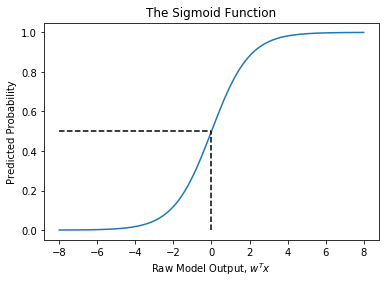

In [44]:
sigmoid = lambda x: 1/(1+np.exp(-x))

raw_model_output = np.linspace(-8,8,1000)
plt.plot(raw_model_output, sigmoid(raw_model_output));
plt.plot([0,0],[0,0.5], '--k')
plt.plot([-8,0],[0.5,0.5], '--k')
plt.xlabel("Raw Model Output, $w^Tx$"); plt.ylabel("Predicted Probability");plt.title("The Sigmoid Function");

### Predicting probabilities 

- You can get the probabilities (confidence) of the classifier's prediction using the `model.predict_proba` method. 

In [29]:
lr.predict_proba([example])
#soft prediction
# Take x = W*features + b -> sigmoid(x) -> y' -> Probability of the 1 class 

array([[0.87149469, 0.12850531]])

Let's examine whether we get the same answer if we call sigmoid on $w^Tx + b$

In [30]:
log_reg_out = np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)
log_reg_out

array([-1.9142395])

In [31]:
sigmoid(log_reg_out)

array([0.12850531])

Sanity Check: We got the same score!

In [32]:
# Predicting probabilities
data_dict = {"y":y_train[:10], 
             "predicted y": lr.predict(X_train[:10]).tolist(),
             "probabilities": lr.predict_proba(X_train[:10]).tolist()}
pd.DataFrame(data_dict)

,y,predicted y,probabilities
160,Canada,Canada,"[0.7542426152857498, 0.2457573847142503]"
127,Canada,Canada,"[0.6735566943926773, 0.3264433056073227]"
169,Canada,Canada,"[0.8500846089655976, 0.1499153910344024]"
188,Canada,Canada,"[0.806138658273788, 0.19386134172621203]"
187,Canada,Canada,"[0.8742847430287988, 0.12571525697120128]"
192,Canada,Canada,"[0.5453613010454853, 0.4546386989545147]"
62,USA,USA,"[0.1706365523468938, 0.8293634476531062]"
141,Canada,Canada,"[0.7320892359745648, 0.2679107640254352]"
183,Canada,Canada,"[0.7551502248928569, 0.2448497751071431]"
37,USA,USA,"[0.11086920605861228, 0.8891307939413877]"


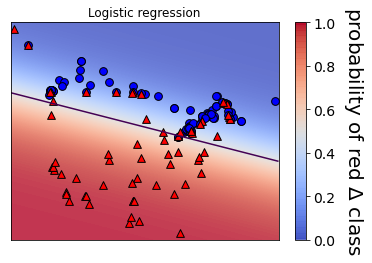

In [35]:
plot_classifier(X_train, y_train, lr, proba=True, ax=plt.gca())
plt.title("Logistic regression");

**Model Evaluation**

We don't always evaluate a model based on accuracy.

A confusion matrix is a table that allows us evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [34]:
from sklearn import metrics

y_pred=lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[28,  0],
       [ 7,  7]])

In [35]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()

**Accuracy:** Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.

In [32]:
accuracy = (TP+TN)/(TN+FP+FN+TP)
accuracy

0.8333333333333334

**Precision:** Fraction of predicted positives that are actually positive.

In [33]:
precision = TP/(TP+FP) 
precision

1.0

**Recall:** Fraction of true positives that are predicted positive

In [34]:
recall = TP/(TP+FN)
recall

0.5

![img](https://www.geavis.si/assets1191/wp-content/uploads/2017/09/Geavis-difference-accuracy-precision.jpg)

### Interpretability of linear classifiers


- One of the primary advantage of linear classifiers is their ability to interpret models. 
- What features are most useful for prediction? 
- The model has learned coefficient for each feature. 


- In linear models, the $j^{th}$  coefficient tells us how feature $j$ affects the prediction. 
- So looking at the features which have coefficient with bigger magnitudes might be useful.


In [40]:
importance = lr.coef_[0]
# y = w1*x1 + w2*x2 + b
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.04367
Feature: 1, Score: -0.15142


#### Limitations of linear classifiers 

- Is your data "linearly separable"? Can you draw a hyperplane between these datapoints that separates them with 0 error. 
    - If the training examples can be separated by a linear decision rule, they are **linearly separable**.
    
- Do not worry! You will learn a lot of models that will be able do deal with not linearly separable data.

### 4.Multinomial Logistic Regression

- So far we have been talking about binary classification using Logistic Regression
- Can we use these classifiers when there are more than two classes? 
    - ["ImageNet" computer vision competition](http://www.image-net.org/challenges/LSVRC/), for example, has 1000 classes 
- Can we use logistic regression for that?

Let's create some synthetic data with two features and four classes. 

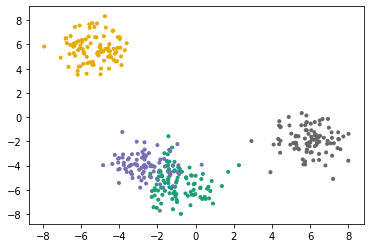

In [28]:
from sklearn.datasets import make_blobs

# generate blobs with fixed random generator
X, y = make_blobs(n_samples=500, centers=4, random_state=300)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(*X_train.T, c=y_train, marker=".", cmap="Dark2");

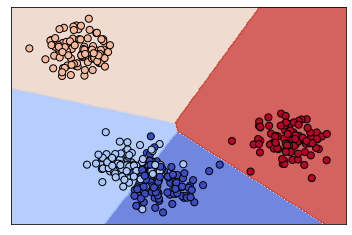

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
plot_classifier(X_train, y_train, lr);

In [30]:
print("LR classes: ", lr.classes_)
print("Predict proba: ", lr.predict_proba([X_test[0]]))

LR classes:  [0 1 2 3]
Predict proba:  [[6.63847951e-01 3.36060478e-01 1.38295198e-05 7.77410760e-05]]


### So it is possible, but how is it done ... Multi-class strategies

- Two common strategies
    - One-vs-rest
    - One-vs-one

By default LogisticRegression uses one-vs-rest strategy to deal with multi-class

### One-vs-rest scheme

- Uses "one-vs-rest" scheme (also known as one-vs-all)
  - turns $k$-class classification into $k$ binary classification problems
  - builds $k$ binary classifiers; for each classifier, the class is fitted against all the other classes
  - each one gives a probability of that class assuming it to be "positive" using the sigmoid function
  - normalize these values across all the classes
  - the class with the maximum value is the prediction 
  - you can do this yourself for any binary classifier using the meta-classifier [`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

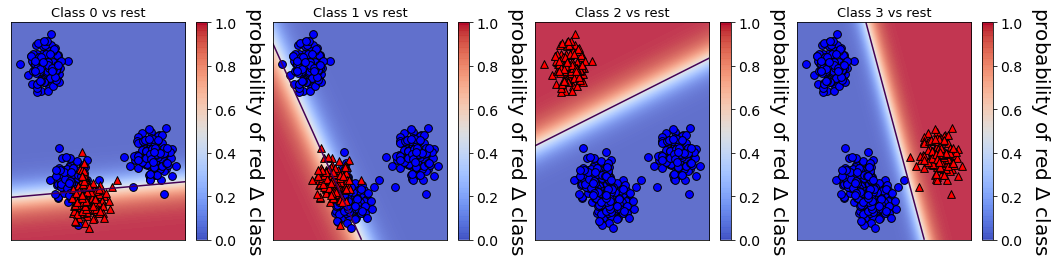

In [38]:
# Here's how one-vs-rest works:
def one_vs_rest_plots(model_class, X, y):
    plt.figure(figsize=(18, 4))
    classes = np.unique(y)
    k = len(classes)
    for i, c in enumerate(classes):
        plt.subplot(1, k, i + 1)

        y_binary = y == c
        model = model_class()
        model.fit(X, y_binary)
        plot_classifier(X, y_binary, model, ax=plt.gca(), proba=True)
        plt.title("Class %d vs rest" % c, fontsize=13)


one_vs_rest_plots(LogisticRegression, X, y)

## Summary

- Logistic regression is a linear classifier; it has one coefficient per feature, plus an intercept. 
- We combine our features and coefficients with a dot product, that is $w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$.
- The decision boundary is a hyperplane dividing the feature space in half.
- You can think of the coefficients as controlling the orientation/tilt of the hyperplane and the bias representing the intercept (offset from the origin). 